# Data Exploration: Southwest Airlines OTP and Load Factor Analysis

This notebook explores raw data from the **Bureau of Transportation Statistics (BTS)**, specifically:

- **Load Factor data** (2020–2025, annual files)  
- **On-Time Performance (OTP) data** (2020–2025, monthly files)

**Goal:**  
Understand the **structure**, **quality**, and **characteristics** of the data to prepare for further analysis.

---

## Import Libraries and Setup


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')

from src import DataLoader, DataCleaner

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# %matplotlib inline

---


### Cell 1. Load Raw Data

In [6]:
# Initialize loader
loader = DataLoader(base_path='../data/raw')

# Load both datasets
lf_raw, otp_raw = loader.load_all_data()

Loading Load Factor Data
Found 6 Load Factor files
Loading: 2020_Segment.csv
Loading: 2021_Segment.csv
Loading: 2022_Segment.csv
Loading: 2023_Segment.csv
Loading: 2024_Segment.csv
Loading: 2025_Segment.csv
Total Load Factor records: 2,169,844

Loading OTP Data
Found 66 OTP files
Loading: APR_2020_OTP_SEGMENT.csv
Loading: APR_2021_OTP_SEGMENT.csv
Loading: APR_2022_OTP_SEGMENT.csv
Loading: APR_2023_OTP_SEGMENT.csv
Loading: APR_2024_OTP_SEGMENT.csv
Loading: APR_2025_OTP_SEGMENT.csv
Loading: AUG_2020_OTP_SEGMENT.csv
Loading: AUG_2021_OTP_SEGMENT.csv
Loading: AUG_2022_OTP_SEGMENT.csv
Loading: AUG_2023_OTP_SEGMENT.csv
Loading: AUG_2024_OTP_SEGMENT.csv
Loading: DEC_2020_OTP_SEGMENT.csv
Loading: DEC_2021_OTP_SEGMENT.csv
Loading: DEC_2022_OTP_SEGMENT.csv
Loading: DEC_2023_OTP_SEGMENT.csv
Loading: DEC_2024_OTP_SEGMENT.csv
Loading: FEB_2020_OTP_SEGMENT.csv
Loading: FEB_2021_OTP_SEGMENT.csv
Loading: FEB_2022_OTP_SEGMENT.csv
Loading: FEB_2023_OTP_SEGMENT.csv
Loading: FEB_2024_OTP_SEGMENT.csv
Loadi

---


### Cell 2. Explore Load Factor Data

In [7]:
print("Load Factor Data Shape:", lf_raw.shape)
print("\nColumn Names and Types:")
print(lf_raw.dtypes)
print("\nFirst few rows:")
lf_raw.head()


# Check for missing values
print("Missing Values:")
print(lf_raw.isnull().sum())
print(f"\nPercentage missing:")
print((lf_raw.isnull().sum() / len(lf_raw) * 100).round(2))


# Summary statistics
lf_raw.describe()


# Check unique carriers
print(f"Number of unique carriers: {lf_raw['CARRIER'].nunique()}")
print("\nTop 10 carriers by record count:")
print(lf_raw['CARRIER'].value_counts().head(10))
print(f"\nSouthwest (WN) records: {len(lf_raw[lf_raw['CARRIER'] == 'WN']):,}")


# Date range in data
print("Year range:", lf_raw['YEAR'].min(), "-", lf_raw['YEAR'].max())
print("Month range:", lf_raw['MONTH'].min(), "-", lf_raw['MONTH'].max())



Load Factor Data Shape: (2169844, 10)

Column Names and Types:
DEPARTURES_SCHEDULED    float64
DEPARTURES_PERFORMED    float64
SEATS                   float64
PASSENGERS              float64
CARRIER                  object
ORIGIN                   object
DEST                     object
AIRCRAFT_TYPE             int64
YEAR                      int64
MONTH                     int64
dtype: object

First few rows:
Missing Values:
DEPARTURES_SCHEDULED    0
DEPARTURES_PERFORMED    0
SEATS                   0
PASSENGERS              0
CARRIER                 0
ORIGIN                  0
DEST                    0
AIRCRAFT_TYPE           0
YEAR                    0
MONTH                   0
dtype: int64

Percentage missing:
DEPARTURES_SCHEDULED    0.0
DEPARTURES_PERFORMED    0.0
SEATS                   0.0
PASSENGERS              0.0
CARRIER                 0.0
ORIGIN                  0.0
DEST                    0.0
AIRCRAFT_TYPE           0.0
YEAR                    0.0
MONTH                   

---


### Cell 3. Explore OTP Data

In [8]:
print("OTP Data Shape:", otp_raw.shape)
print("\nColumn Names and Types:")
print(otp_raw.dtypes)
print("\nFirst few rows:")
otp_raw.head()


# Check for missing values
print("Missing Values:")
print(otp_raw.isnull().sum())
print(f"\nPercentage missing:")
print((otp_raw.isnull().sum() / len(otp_raw) * 100).round(2))


# Summary statistics
otp_raw.describe()


# Check unique carriers
print(f"Number of unique carriers: {otp_raw['OP_UNIQUE_CARRIER'].nunique()}")
print("\nTop 10 carriers by record count:")
print(otp_raw['OP_UNIQUE_CARRIER'].value_counts().head(10))
print(f"\nSouthwest (WN) records: {len(otp_raw[otp_raw['OP_UNIQUE_CARRIER'] == 'WN']):,}")


# Date range in data
print("Year range:", otp_raw['YEAR'].min(), "-", otp_raw['YEAR'].max())
print("Month range:", otp_raw['MONTH'].min(), "-", otp_raw['MONTH'].max())


OTP Data Shape: (34786532, 16)

Column Names and Types:
YEAR                     int64
MONTH                    int64
OP_UNIQUE_CARRIER       object
OP_CARRIER_FL_NUM      float64
ORIGIN                  object
DEST                    object
DEP_DEL15              float64
ARR_DEL15              float64
CANCELLED              float64
DIVERTED               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
FL_DATE                 object
dtype: object

First few rows:
Missing Values:
YEAR                          0
MONTH                         0
OP_UNIQUE_CARRIER             0
OP_CARRIER_FL_NUM             1
ORIGIN                        0
DEST                          0
DEP_DEL15                785017
ARR_DEL15                882234
CANCELLED                     0
DIVERTED                      0
CARRIER_DELAY          28389502
WEATHER_DELAY          28389502
NAS_DELAY        

---


### Cell 4. Clean Data and Filter for Southwest

In [9]:
# Initialize cleaner for Southwest (WN)
cleaner = DataCleaner(carrier_code='WN')

# Clean load factor data
lf_clean = cleaner.clean_load_factor_data(lf_raw)
print("\n" + "="*60)

# Clean OTP data
otp_clean = cleaner.clean_otp_data(otp_raw)

Cleaning Load Factor data... Initial records: 2,169,844
After filtering for WN: 250,326 records
Removed 0 rows with missing critical values
Final Load Factor records: 249,691

Cleaning OTP data... Initial records: 34,786,532
After filtering for WN: 6,878,676 records
Final OTP records: 6,878,676


---


### Cell 5. Explore Southwest-Specific Data

Southwest Load Factor Data:
Date range: 2020-01-01 00:00:00 to 2025-06-01 00:00:00
Number of unique routes: 2980
Number of unique origins: 179
Number of unique destinations: 180

Southwest OTP Data:
Date range: 2020-01-01 00:00:00 to 2025-06-01 00:00:00
Number of unique routes: 1097
Number of unique origins: 107
Number of unique destinations: 107
Southwest Overall Load Factor (2020-2025): 73.22%
Load Factor by Year:
YEAR
2020    49.480491
2021    76.762496
2022    80.081926
2023    76.025629
2024    76.979633
2025    72.903045
dtype: float64


/tmp/ipykernel_35029/142428678.py:21: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lf_by_year = lf_clean.groupby('YEAR').apply(
/tmp/ipykernel_35029/142428678.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_lf = lf_clean.groupby('DATE').apply(


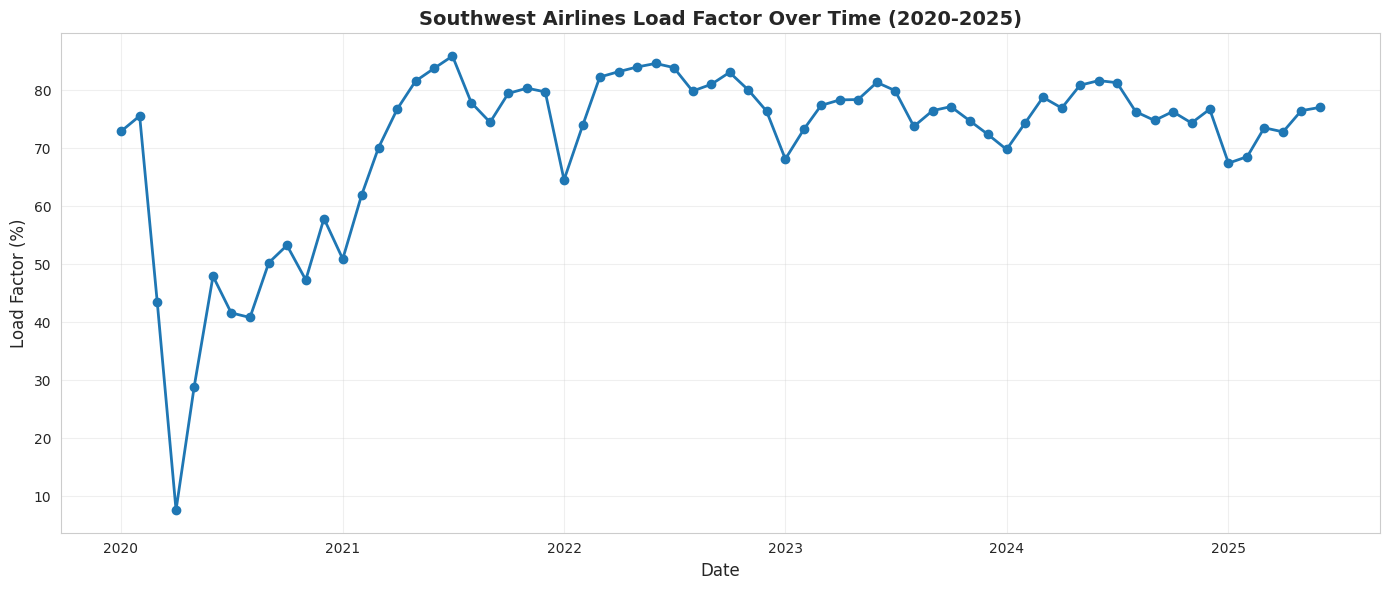

Southwest Overall OTP Metrics (2020-2025):
Total flights: 6,878,676
Departure On-Time %: 77.49%
Arrival On-Time %: 80.67%
Cancellation %: 2.57%


/tmp/ipykernel_35029/142428678.py:59: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  otp_by_year = otp_clean.groupby('YEAR').apply(



OTP Metrics by Year:
        flights  dep_ontime_pct  arr_ontime_pct  cancel_pct
YEAR                                                       
2020   961276.0       92.889243       94.180443    8.097778
2021  1064640.0       73.728209       78.209348    2.207789
2022  1307149.0       72.080000       76.647268    3.263209
2023  1438465.0       75.567150       78.451822    0.995853
2024  1419419.0       76.814316       79.610390    0.829353
2025   687727.0       77.466349       80.085557    0.954158


/tmp/ipykernel_35029/142428678.py:73: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_otp = otp_clean.groupby('DATE').apply(


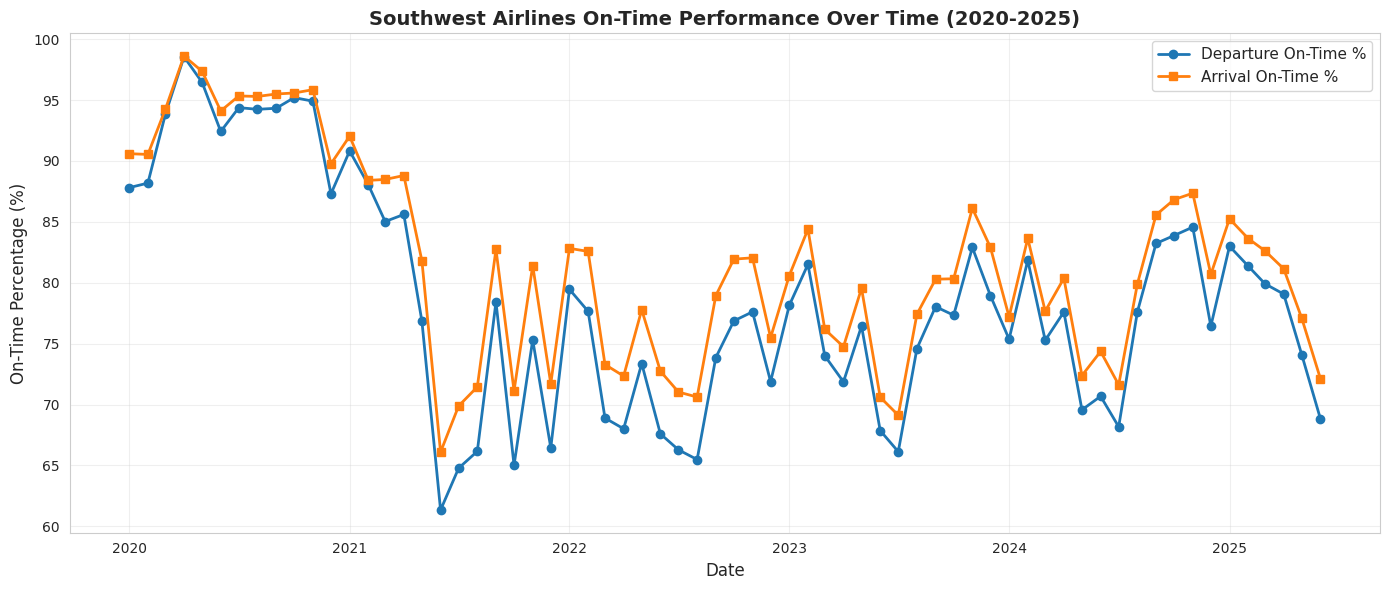

In [10]:
# Check date coverage for Southwest
print("Southwest Load Factor Data:")
print(f"Date range: {lf_clean['DATE'].min()} to {lf_clean['DATE'].max()}")
print(f"Number of unique routes: {lf_clean['ROUTE'].nunique()}")
print(f"Number of unique origins: {lf_clean['ORIGIN'].nunique()}")
print(f"Number of unique destinations: {lf_clean['DEST'].nunique()}")

print("\nSouthwest OTP Data:")
print(f"Date range: {otp_clean['DATE'].min()} to {otp_clean['DATE'].max()}")
print(f"Number of unique routes: {otp_clean['ROUTE'].nunique()}")
print(f"Number of unique origins: {otp_clean['ORIGIN'].nunique()}")
print(f"Number of unique destinations: {otp_clean['DEST'].nunique()}")


# Calculate basic load factor for Southwest
overall_lf = (lf_clean['PASSENGERS'].sum() / lf_clean['SEATS'].sum() * 100)
print(f"Southwest Overall Load Factor (2020-2025): {overall_lf:.2f}%")


# Load factor by year
lf_by_year = lf_clean.groupby('YEAR').apply(
    lambda x: (x['PASSENGERS'].sum() / x['SEATS'].sum() * 100)
)

print("Load Factor by Year:")
print(lf_by_year)


# Visualize load factor trend
monthly_lf = lf_clean.groupby('DATE').apply(
    lambda x: (x['PASSENGERS'].sum() / x['SEATS'].sum() * 100)
).reset_index()
monthly_lf.columns = ['DATE', 'LOAD_FACTOR']

plt.figure(figsize=(14, 6))
plt.plot(monthly_lf['DATE'], monthly_lf['LOAD_FACTOR'], marker='o', linewidth=2)
plt.title('Southwest Airlines Load Factor Over Time (2020-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Load Factor (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Calculate basic OTP metrics
total_flights = len(otp_clean)
dep_ontime_pct = (1 - otp_clean['DEP_DEL15'].sum() / total_flights) * 100
arr_ontime_pct = (1 - otp_clean['ARR_DEL15'].sum() / total_flights) * 100
cancel_pct = (otp_clean['CANCELLED'].sum() / total_flights) * 100

print(f"Southwest Overall OTP Metrics (2020-2025):")
print(f"Total flights: {total_flights:,}")
print(f"Departure On-Time %: {dep_ontime_pct:.2f}%")
print(f"Arrival On-Time %: {arr_ontime_pct:.2f}%")
print(f"Cancellation %: {cancel_pct:.2f}%")


# OTP by year
otp_by_year = otp_clean.groupby('YEAR').apply(
    lambda x: pd.Series({
        'flights': len(x),
        'dep_ontime_pct': (1 - x['DEP_DEL15'].sum() / len(x)) * 100,
        'arr_ontime_pct': (1 - x['ARR_DEL15'].sum() / len(x)) * 100,
        'cancel_pct': (x['CANCELLED'].sum() / len(x)) * 100
    })
)

print("\nOTP Metrics by Year:")
print(otp_by_year)


# Visualize OTP trend
monthly_otp = otp_clean.groupby('DATE').apply(
    lambda x: pd.Series({
        'dep_ontime_pct': (1 - x['DEP_DEL15'].sum() / len(x)) * 100,
        'arr_ontime_pct': (1 - x['ARR_DEL15'].sum() / len(x)) * 100
    })
).reset_index()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(monthly_otp['DATE'], monthly_otp['dep_ontime_pct'], 
        marker='o', label='Departure On-Time %', linewidth=2)
ax.plot(monthly_otp['DATE'], monthly_otp['arr_ontime_pct'], 
        marker='s', label='Arrival On-Time %', linewidth=2)
ax.set_title('Southwest Airlines On-Time Performance Over Time (2020-2025)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('On-Time Percentage (%)', fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---


### Cell 6. Save Cleaned Data

In [11]:
# Save cleaned data for use in other notebooks
lf_clean.to_csv('../data/processed/lf_clean_southwest.csv', index=False)
otp_clean.to_csv('../data/processed/otp_clean_southwest.csv', index=False)

print("Cleaned data saved to data/processed/")

Cleaned data saved to data/processed/


---


## Key Findings from Exploration

1. **Data Quality**:  
   Both datasets provide robust coverage of Southwest Airlines from 2020 to 2025.

2. **Load Factor Trends**:  
   Observable patterns over time, likely reflecting the impact of COVID-19 and subsequent recovery.

3. **OTP Trends**:  
   On-time performance metrics display variations across the time period.

4. **Next Steps**:  
   - Identify the top 5 routes by passenger volume.
   - Analyze the relationship between load factor and OTP for these routes.
